# Libraries and Dataset

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
%matplotlib inline

In [2]:
#read the CSV file 
missingdf = pd.read_csv("car_features_dirty.csv")

# Lets understand the Data

In [3]:
#list all columns
missingdf.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
#see data types
missingdf.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Lets Treat Missing Values First

In [5]:
#we remove missings first. Let's see how many missings we have
missingdf.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

<Axes: >

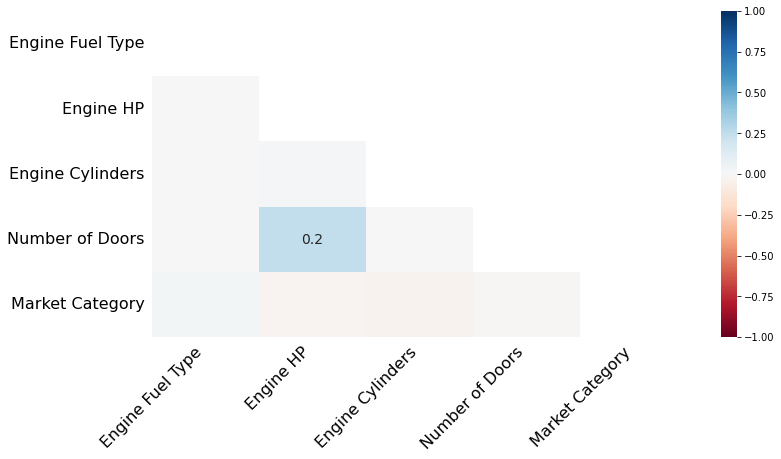

In [6]:
mano.heatmap(missingdf, figsize=(12,6))

Let us first fix Engine Fuel type

In [7]:
#Dealing with fuel type (let's see the distribution) here we see the mode
missingdf['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

Here the ideal choice will be filling by mode as we can see "Regular Unleaded" is quite superior

In [8]:
#let us replace the one missing value by the mode, i.e., regular unleaded and the data is seen again with the values treated
missingdf['Engine Fuel Type'].fillna('regular unleaded',inplace=True)
missingdf.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We are done with fuel type, now lets do number of doors

In [9]:
missingdf['Number of Doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

Here again we wil do Mode as we can see "4" consits of almost 80% data

In [10]:
missingdf['Number of Doors'].fillna(4,inplace=True)
missingdf.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Now lets take a look at Engine HP distribution

In [11]:
missingdf['Engine HP'].value_counts()

200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
660.0      1
661.0      1
573.0      1
592.0      1
154.0      1
Name: Engine HP, Length: 356, dtype: int64

here we cannot do Mean Median Mode because values can vary accordingly

To fill engine HP, my approach is to do KNN of MSRP or Vehicle Cateogary and Engine HP

In [12]:
#making two categories of engine HP 
df_missing = missingdf['Engine HP'].isnull()
df_not_missing = missingdf['Engine HP'].notnull()

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer (n_neighbors=10)
missingdf_knn = missingdf.copy(deep=True)
missingdf_knn[['MSRP','Engine HP']] = imputer.fit_transform(missingdf_knn[['MSRP','Engine HP']])
missingdf_knn

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120.0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670.0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620.0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920.0


In [14]:
df_imputed = pd.concat([df_not_missing, df_missing], axis=0).sort_index()


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='MSRP', ylabel='Engine HP'>

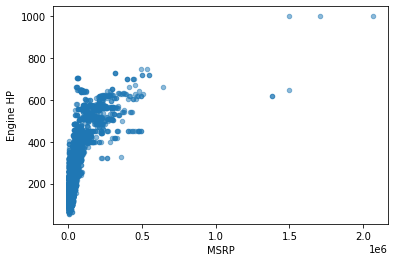

In [15]:
missingdf_knn.plot(x='MSRP',y='Engine HP',kind='scatter',alpha=0.5,cmap='rainbow')

we did KNN and it failed as Engine HP and MSRP are not showing any great relation so we are now going for mean regression

In [16]:
missingdf['Vehicle Style'] = missingdf['Vehicle Style'].astype(str)

In [17]:
means_by_category = missingdf.groupby('Vehicle Style')['Engine HP'].mean()


In [18]:
missingdf['Engine HP'] = missingdf['Vehicle Style'].apply(lambda x: means_by_category[x])


In [19]:
df_imputed = pd.concat([df_not_missing, df_missing], axis=0).sort_index()


In [20]:
means_by_category = missingdf.groupby('Vehicle Style')['Engine HP'].mean()
missingdf['Engine HP'] = missingdf.apply(lambda row: means_by_category[row['Vehicle Style']] if pd.isna(row['Engine HP']) else row['Engine HP'], axis=1)


In [21]:
missingdf.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Now lets take a look at Engine Cylinder

In [22]:
missingdf['Engine Cylinders'].value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

Here we can see there are 56 values that say 0 cylinders which i believe is wrong, lets map a relationship between cylinder and HP

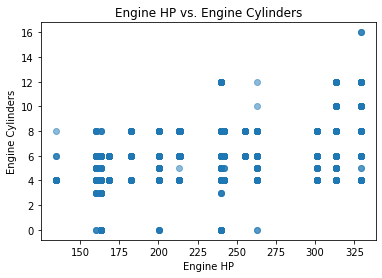

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot of engine HP vs. engine cylinders
plt.scatter(missingdf['Engine HP'], missingdf['Engine Cylinders'], alpha=0.5)

# Add a title and labels for the axes
plt.title('Engine HP vs. Engine Cylinders')
plt.xlabel('Engine HP')
plt.ylabel('Engine Cylinders')

# Show the plot
plt.show()


I dont think we need Engine Cylinder category since cylinder size does not plays a major part as features, I will discuss this further but for now we are dropping it

In [24]:
missingdf = missingdf.drop('Engine Cylinders', axis=1)


Now lets have a look at market cateogary

In [25]:
missingdf['Market Category'].value_counts()

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: Market Category, Length: 71, dtype: int64

Custom API - Treating Missing Market Value using AI Random forest classifier by identifying features and classifing the missing category thru features

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [27]:
# Split the dataset into training and test sets
train_df = missingdf.dropna(subset=['Market Category'])
test_df = missingdf[missingdf['Market Category'].isnull()]

# using columns as features
features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
             'Transmission Type', 'Driven_Wheels',
            'Number of Doors', 'Vehicle Size', 'Vehicle Style',
            'highway MPG', 'city mpg', 'Popularity', 'MSRP']

#process the data by encoding features
encoder = LabelEncoder()
for col in features:
    if missingdf[col].dtype == 'object':
        encoder.fit(missingdf[col].astype(str)) # Fit on the entire dataset
        train_df[col] = encoder.transform(train_df[col].astype(str))
        test_df[col] = encoder.transform(test_df[col].astype(str))

# Train a random forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X_train = train_df[features]
y_train = train_df['Market Category']
rf.fit(X_train, y_train)

# Use the trained model to predict the missing values in the test set
X_test = test_df[features]
y_pred = rf.predict(X_test)

# Impute the missing values in the 'Market Category' column of the original dataset
missingdf.loc[missingdf['Market Category'].isnull(), 'Market Category'] = y_pred
print(y_pred)

<ipython-input-27-f25e7a4ec7c7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = encoder.transform(train_df[col].astype(str))
<ipython-input-27-f25e7a4ec7c7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = encoder.transform(test_df[col].astype(str))
<ipython-input-27-f25e7a4ec7c7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

['Performance' 'Performance' 'Performance' ... 'Performance' 'Performance'
 'Performance']


In [28]:
missingdf.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# As we can see all missing values are treated now, we will now treat inconsistent data

In [29]:
# Unique Values Count
make_counts = missingdf['Make'].value_counts()

print(make_counts)


Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

We counted unique values manually and the make looks good, next up we go to Model

In [30]:
model_counts = missingdf['Model'].value_counts()

print(model_counts)

Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
MKZ Hybrid              1
M4 GTS                  1
LFA                     1
Horizon                 1
Zephyr                  1
Name: Model, Length: 915, dtype: int64


As you can see we cannot treat MODEL by manually counting unique values, however it is not useful to work on models since the category MAKE play a major role over MODEL and the MAKE model was treated above alredy. We will drop the MODEL colum ahead

For years we can check using min max and describe function that our data is consistent

In [31]:
# Print the minimum and maximum values in the Year column
print('Minimum Year:', missingdf['Year'].min())
print('Maximum Year:', missingdf['Year'].max())
# Describe the Year column
year_desc = missingdf['Year'].describe()

print(year_desc)


Minimum Year: 1990
Maximum Year: 2017
count    11914.000000
mean      2010.384338
std          7.579740
min       1990.000000
25%       2007.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: Year, dtype: float64


Looks good, onto next

In [32]:
make_counts = missingdf['Engine Fuel Type'].value_counts()

print(make_counts)


regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64


Looks Good Onto next

In [33]:
make_counts = missingdf['Transmission Type'].value_counts()

print(make_counts)


AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64


Now lets treat the UNKNOWN, since these are only 19 values we are dropping the UNKNOWN Values

In [34]:
# Drop rows with 'unknown' values
missingdf = missingdf[missingdf['Transmission Type'] != 'UNKNOWN']


Onto Next

In [35]:
make_counts = missingdf['Transmission Type'].value_counts()

print(make_counts)

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
Name: Transmission Type, dtype: int64


Looks Good onto next

In [36]:
make_counts = missingdf['Driven_Wheels'].value_counts()

print(make_counts)

front wheel drive    4783
rear wheel drive     3358
all wheel drive      2353
four wheel drive     1401
Name: Driven_Wheels, dtype: int64


It is all good, now we move to doors for that we will do min max function

In [37]:
# Print the minimum and maximum values in the Year column
print('Minimum Year:', missingdf['Number of Doors'].min())
print('Maximum Year:', missingdf['Number of Doors'].max())

Minimum Year: 2.0
Maximum Year: 4.0


Looks Good Now lets have a look at market category(Done in the end)

Lets move to vehicle size

In [38]:
make_counts = missingdf['Vehicle Size'].value_counts()

print(make_counts)

Compact    4758
Midsize    4368
Large      2769
Name: Vehicle Size, dtype: int64


Looks Good. Onto Vehicle Style

In [39]:
make_counts = missingdf['Vehicle Style'].value_counts()

print(make_counts)

Sedan                  3047
4dr SUV                2488
Coupe                  1209
Convertible             791
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           504
Passenger Minivan       417
Regular Cab Pickup      384
2dr SUV                 134
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: Vehicle Style, dtype: int64


Looks Good. Onto Next, we have highway MPG, an int value so we will start the detail view

In [40]:
print('Minimum:', missingdf['highway MPG'].min())
print('Maximum:', missingdf['highway MPG'].max())
year_desc = missingdf['highway MPG'].describe()

print(year_desc)

Minimum: 12
Maximum: 354
count    11895.000000
mean        26.647331
std          8.865157
min         12.000000
25%         22.000000
50%         26.000000
75%         30.000000
max        354.000000
Name: highway MPG, dtype: float64


lets make a box plot to visualize the distribution

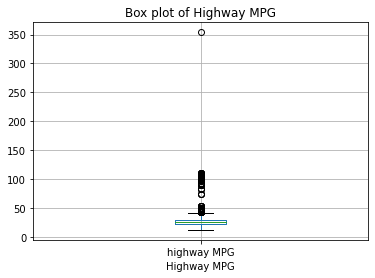

In [41]:
missingdf.boxplot(column='highway MPG')

plt.xlabel('Highway MPG')
plt.title('Box plot of Highway MPG')

plt.show()

As we can see 354 is a clear outlier and we have many anomalities so we will treat it, 
I have treated the anomalities by Z-test where we
compare set of 2 means
set a threshold ususally t< 3







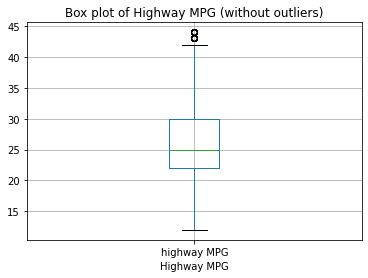

In [42]:
# Calculate the z-scores for the highway MPG
z_scores = np.abs((missingdf['highway MPG'] - missingdf['highway MPG'].mean()) / missingdf['highway MPG'].std())

# Define a threshold for outlier detection
threshold = 2

# Remove the outliers 
missingdf = missingdf.drop(missingdf[z_scores > threshold].index)

# box plot of the treated 'highway MPG' column
missingdf.boxplot(column='highway MPG')

plt.xlabel('Highway MPG')
plt.title('Box plot of Highway MPG (without outliers)')

plt.show()

In [43]:
# Print the minimum and maximum values in the Year column
print('Minimum:', missingdf['highway MPG'].min())
print('Maximum:', missingdf['highway MPG'].max())

year_desc = missingdf['highway MPG'].describe()
print(year_desc)

Minimum: 12
Maximum: 44
count    11755.000000
mean        26.081242
std          6.088141
min         12.000000
25%         22.000000
50%         25.000000
75%         30.000000
max         44.000000
Name: highway MPG, dtype: float64


Now it looks fine, onto next city MPG

In [44]:
# Print the minimum and maximum values in the Year column
print('Minimum:', missingdf['city mpg'].min())
print('Maximum:', missingdf['city mpg'].max())

year_desc = missingdf['city mpg'].describe()

print(year_desc)

Minimum: 7
Maximum: 49
count    11755.000000
mean        19.052318
std          5.112806
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max         49.000000
Name: city mpg, dtype: float64


This looks reasonable, onto next popularity

In [45]:
year_desc = missingdf['Popularity'].describe()

print(year_desc)

count    11755.000000
mean      1553.152956
std       1447.669873
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64


We should normalize this column beacause these values are very hard to intrepret

In [46]:
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Apply normalization 
missingdf['popularity_normalized'] = min_max_normalize(missingdf['Popularity'])

# Print the first five rows just to check the values
print(missingdf['popularity_normalized'].head())

0    0.692131
1    0.692131
2    0.692131
3    0.692131
4    0.692131
Name: popularity_normalized, dtype: float64


Lets Visualize

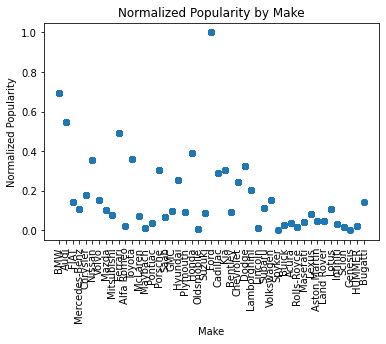

In [47]:
plt.scatter(missingdf['Make'], missingdf['popularity_normalized'])
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Normalized Popularity')
plt.title('Normalized Popularity by Make')
plt.show()

We can clearly see Suzuki is highly popular, so high that it feels like an anomalous point, but it is important for our dataset.

Finally lets see the MSRP

In [48]:
year_desc = missingdf['MSRP'].describe()

print(year_desc)

count    1.175500e+04
mean     4.069720e+04
std      6.045251e+04
min      2.000000e+03
25%      2.099500e+04
50%      2.999500e+04
75%      4.232250e+04
max      2.065902e+06
Name: MSRP, dtype: float64


We cannot say anything about MSRP because the variations seem reasonable, we will only compare the values by drawaing charts and compare

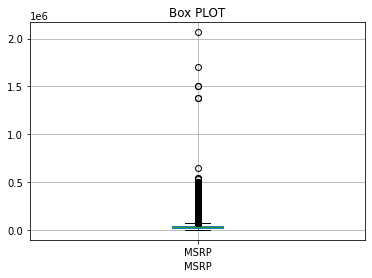

In [49]:
missingdf.boxplot(column='MSRP')

plt.xlabel('MSRP')
plt.title('Box PLOT')

plt.show()

We cannot say anyhting about the distribution as the values can be widely distributed, we will have a look at prices relation with other values such as make, engine hp, popularity, size and style

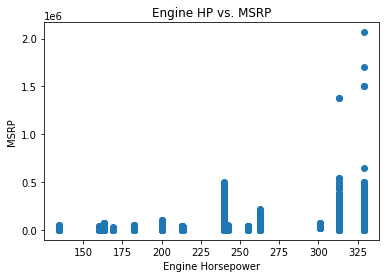

In [50]:
plt.scatter(missingdf['Engine HP'], missingdf['MSRP'])
plt.xlabel('Engine Horsepower')
plt.ylabel('MSRP')
plt.title('Engine HP vs. MSRP')
plt.show()

Quite reasonable as we know prices increase as HP increase

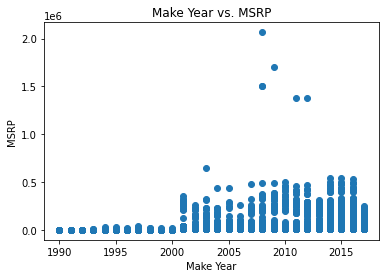

In [51]:
plt.scatter(missingdf['Year'], missingdf['MSRP'])
plt.xlabel('Make Year')
plt.ylabel('MSRP')
plt.title('Make Year vs. MSRP')
plt.show()

quite reasonable again as newer cars are more expensive

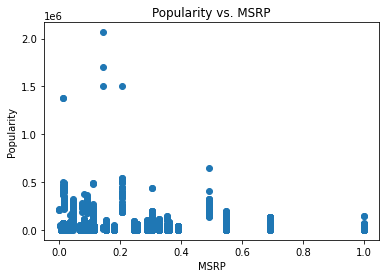

In [52]:
plt.scatter(missingdf['popularity_normalized'], missingdf['MSRP'])
plt.ylabel('Popularity')
plt.xlabel('MSRP')
plt.title('Popularity vs. MSRP')
plt.show()
#check again

As you can see popular cars are less expensive since the most popular brand(Suzuki) is obviosuly very cheap. 

Hence all tests of MSRP clearly verify that our MSRP Values are accurate

In [53]:
missingdf.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'popularity_normalized'],
      dtype='object')

In [54]:
from google.colab import files
missingdf.to_csv('output2.csv', index=False)

files.download('output2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

we saved the cleaned file and we will now do some more statistics for fun.

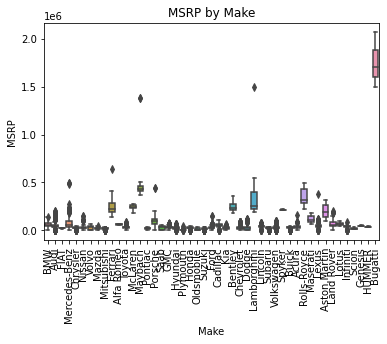

In [55]:
import seaborn as sns

sns.boxplot(x='Make', y='MSRP', data=missingdf)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('MSRP')
plt.title('MSRP by Make')
plt.show()

Make and Model will help us identify MSRP based on cars as we have an idea of expensive brands vs cheap ones

Lets find out the model and make of the most expensive car

In [56]:
# Filter the dataframe to show only rows where MSRP is 337000
model_df = missingdf[missingdf['MSRP'] == 337000]
make_df = missingdf[missingdf['MSRP'] == 337000]

# Print the corresponding value(s) in the Model column
print(model_df['Make'])
print(model_df['Model'])

2858    Bentley
Name: Make, dtype: object
2858    Continental GT3-R
Name: Model, dtype: object


Yes, it is a very expensive car indeed, now lets does the make Bentley's average value and does it justify this price

In [57]:
bentley_df = missingdf[missingdf['Make'] == 'Bentley']

bentley_mean = bentley_df['MSRP'].mean()

print("Mean MSRP value for Bentley:", bentley_mean)



Mean MSRP value for Bentley: 247169.32432432432


Now lets find the model and make of the cheapest car

In [58]:
# Filter the dataframe to show only rows where MSRP is 2000
modelmin_df = missingdf[missingdf['MSRP'] == 2000]
makemin_df = missingdf[missingdf['MSRP'] == 2000]

# Print the corresponding value(s) in the Model column
print(modelmin_df['Make'])
print(modelmin_df['Model'])

17         Audi
18         Audi
19         Audi
20         Audi
21         Audi
          ...  
11481    Suzuki
11482    Suzuki
11792    Subaru
11793    Subaru
11794    Subaru
Name: Make, Length: 1024, dtype: object
17        100
18        100
19        100
20        100
21        100
         ... 
11481    X-90
11482    X-90
11792      XT
11793      XT
11794      XT
Name: Model, Length: 1024, dtype: object


# Lets do some Bi-variable testing

Corellation Matrix

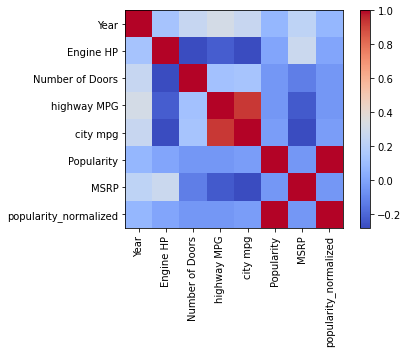

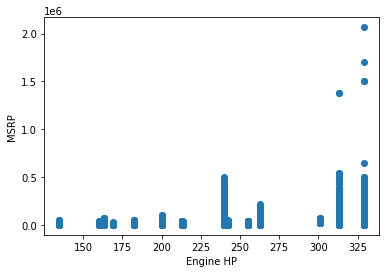

In [59]:
# create a correlation matrix
corr_matrix = missingdf.corr()

# plot the correlation matrix as a heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()


ANOVA Test which specifies that we want to test the effect of the Make variable on the MSRP variable, you can change it accordingly.

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create the ANOVA model formula
formula = 'MSRP ~ C(Make)'

# create the ANOVA model
model = ols(formula, data=missingdf).fit()

# perform ANOVA testing
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)

                sum_sq       df           F  PR(>F)
C(Make)   3.245145e+13     46.0  786.357598     0.0
Residual  1.050362e+13  11708.0         NaN     NaN


Chi Square test which returns the chi-squared statistic, the p-value, the degrees of freedom, and the expected frequencies, you can change accordingly

In [64]:
import scipy.stats as stats

# create a contingency table
contingency_table = pd.crosstab(missingdf['Make'], missingdf['Vehicle Style'])

# perform chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# print the test results
print('Chi-squared statistic:', chi2_stat)
print('P-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-squared statistic: 12356.883666566362
P-value: 0.0
Degrees of freedom: 690
Expected frequencies: [[1.07402807e+01 2.87264994e+00 1.34628669e+01 5.32726499e+01
  1.52207571e+00 2.03658018e+00 1.69572097e+01 6.21692897e-01
  2.59181625e+01 1.45990642e+01 1.33556784e+01 8.93951510e+00
  2.74402382e+00 8.23207146e+00 6.41415568e+01 1.25839217e+01]
 [2.13100808e-01 5.69970225e-02 2.67120374e-01 1.05699702e+00
  3.01999149e-02 4.04083369e-02 3.36452573e-01 1.23351765e-02
  5.14249256e-01 2.89663973e-01 2.64993620e-01 1.77371331e-01
  5.44449171e-02 1.63334751e-01 1.27264994e+00 2.49680987e-01]
 [3.96367503e+00 1.06014462e+00 4.96843896e+00 1.96601446e+01
  5.61718418e-01 7.51595066e-01 6.25801786e+00 2.29434283e-01
  9.56503615e+00 5.38774989e+00 4.92888133e+00 3.29910676e+00
  1.01267546e+00 3.03802637e+00 2.36712888e+01 4.64406635e+00]
 [1.39367929e+01 3.72760527e+00 1.74696725e+01 6.91276053e+01
  1.97507444e+00 2.64270523e+00 2.20039983e+01 8.06720544e-01
  3.36319013e+01 1.89440238e

In [70]:
import statsmodels.api as sm

# select the predictor and response variables
X = missingdf[['Engine HP', 'highway MPG', 'city mpg', 'Popularity']]
y = missingdf['MSRP']

# add an intercept term to the predictor variables
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     419.1
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:37:58   Log-Likelihood:            -1.4531e+05
No. Observations:               11755   AIC:                         2.906e+05
Df Residuals:                   11750   BIC:                         2.907e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.198e+04   4151.223      5.294      

In [69]:
from sklearn.linear_model import LinearRegression

# select the predictor and response variables
X = missingdf[['Engine HP', 'Popularity']] #'highway MPG', 'city mpg']]
y = missingdf['MSRP']

model = LinearRegression().fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: -44806.322514006264
Coefficients: [354.88425774  -2.03748781]
